##                         AllLife Credit Card Customer Segmentation

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_excel('Credit Card Customer Data.xlsx')
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


## DELIVERABLE 1 & 2:

1. Perform univariate analysis on the data to better understand the variables at your
disposal and to get an idea about the no of clusters. Perform EDA, create
visualizations to explore data. (10 marks)

2. Properly comment on the codes, provide explanations of the steps taken in the
notebook and conclude your insights from the graphs. (5 marks)

In [10]:
data.tail()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [11]:
data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [13]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB
None


In [15]:
data.corr()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Sl_No,1.000000,0.052886,0.677962,0.739329,0.406438,0.033916,-0.684125
Customer Key,0.052886,1.000000,0.068604,-0.010281,-0.000560,0.022506,0.005968
Avg_Credit_Limit,0.677962,0.068604,1.000000,0.608860,-0.100312,0.551385,-0.414352
Total_Credit_Cards,0.739329,-0.010281,0.608860,1.000000,0.315796,0.167758,-0.651251
Total_visits_bank,0.406438,-0.000560,-0.100312,0.315796,1.000000,-0.551861,-0.506016
Total_visits_online,0.033916,0.022506,0.551385,0.167758,-0.551861,1.000000,0.127299
Total_calls_made,-0.684125,0.005968,-0.414352,-0.651251,-0.506016,0.127299,1.000000


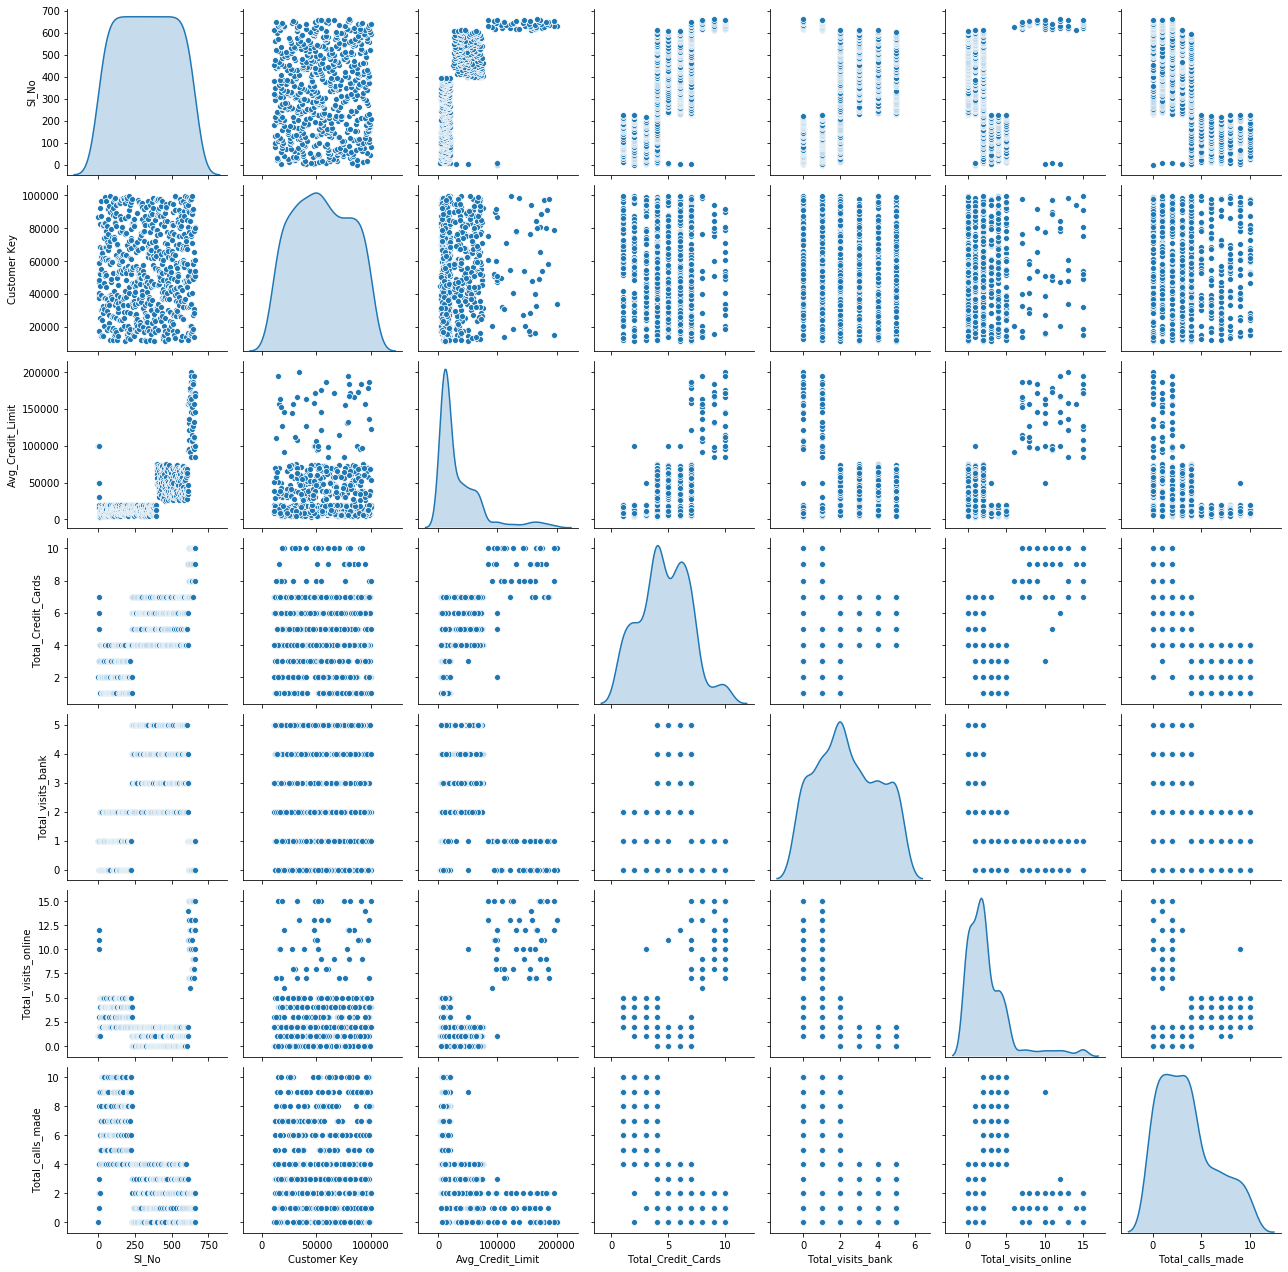

In [17]:
sns.pairplot(data,diag_kind='kde')

DATA OBSERVATIONS:
 - Sl_No:                 
 - Customer Key         
 - Avg_Credit_Limit: has about 4 peaks     
 - Total_Credit_Cards: has about 7 peaks
 - Total_visits_bank ~ 6 peaks
 - Total_visits_online ~ 4 peaks
 - Total_calls_made ~ 3 peaks

In order to provide better insights and recognize customer behavior in this database, it's best to group them according to their total credit card that each customer pocess. Then, we can observe the trends of credit availability and their likelihood to refer one way of requesting for service than the other.

In [128]:
data.groupby(data['Total_Credit_Cards']).mean() #group the values by the "total credit cards"


,Sl_No,Customer Key,Avg_Credit_Limit,Total_visits_bank,Total_visits_online,Total_calls_made
Total_Credit_Cards,,,,,,
1,114.305085,58315.423729,11457.627119,0.932203,3.491525,7.220339
2,116.218750,57451.187500,13187.500000,0.921875,3.531250,6.515625
3,117.566038,54755.924528,13301.886792,0.867925,3.698113,6.641509
4,321.940397,51880.860927,26311.258278,2.768212,1.728477,3.529801
5,409.040541,54450.256757,34689.189189,3.256757,1.216216,2.135135
6,405.829060,57135.333333,33205.128205,3.555556,1.162393,1.914530
7,447.712871,54938.465347,44495.049505,3.207921,1.584158,2.099010
8,636.000000,46567.181818,139454.545455,0.636364,9.272727,0.818182
9,633.000000,71347.636364,140090.909091,0.727273,11.272727,1.272727


==> According to the data correlation table and this groupby table, there's a directly proportional relationship between the number of credit cards with the average credit limit (corr value = 0.6) and the time visit online (corr value = 0.55), and a indirectly proportional relationship between the number of credit cards with the total calls made (corr value = -0.41)

In [28]:
#SI_No and Customer Key are not relevant in observing the trend, so we can drop those 2 columns.

newdata1=data.drop(['Sl_No','Customer Key'], axis=1)
newdata1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


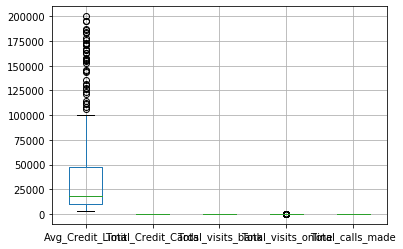

In [30]:
# plotting boxplots to observe for outliners

newdata1.boxplot()

==> It's best to plot avergae credit limit individually to observe the range of it better.
Other variations of # of credit line, total visit banks, total visits online, total calls made are all integers and ranging in a predictable range.

In [31]:
newdata1.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


- Total credit cards: min is 1, max is 10
- Total visits bank: min is 0, max is 5
- Total visits online: min is 0, max is 15
- Total calls made: min is 0, max is 10

{'whiskers': [<matplotlib.lines.Line2D at 0x1a280fb890>,
 'caps': [<matplotlib.lines.Line2D at 0x1a28100390>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a280a3cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1a28100d90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28106310>],
 'means': []}

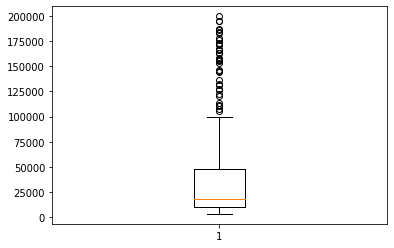

In [32]:
plt.boxplot(newdata1['Avg_Credit_Limit'])

In [34]:
#Log transform for the Avg Credit Limit values
newdata1['Avg_Credit_Limit'] = np.log(newdata1['Avg_Credit_Limit'])
newdata1.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,2.443470,2,1,1,0
1,2.381376,3,0,10,9
2,2.381376,7,1,3,4
3,2.333013,5,1,1,4
4,2.443470,6,0,12,3


{'whiskers': [<matplotlib.lines.Line2D at 0x1a28165d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2816d890>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2815b150>],
 'medians': [<matplotlib.lines.Line2D at 0x1a281742d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a28174810>],
 'means': []}

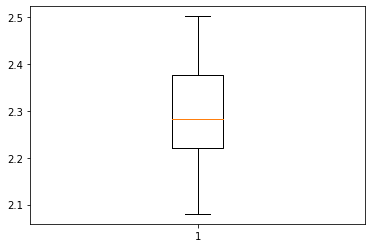

In [35]:
plt.boxplot(newdata1['Avg_Credit_Limit'])

==> after processing and group all the data, according to this boxplot, there is not values for "avg credit line" that are the outliners compared to before processing. The dataset is now ready for calculasting Kmean.

## DELIVERABLE 3: Execute K-MEANS clustering use elbow plot and analyse clusters using boxplot (10 marks)

In [38]:
import os
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


In [41]:
cluster_range = range(1,10)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters, n_init = 5)
    clusters.fit(newdata1)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)

clusters_df = pd.DataFrame({"num_clusters": cluster_range, "cluster_errors": cluster_errors})
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,15947.352579
1,2,9377.250887
2,3,4204.153541
3,4,3588.251959
4,5,2983.372725
5,6,2679.535559
6,7,2490.399045
7,8,2266.259311
8,9,2102.328431


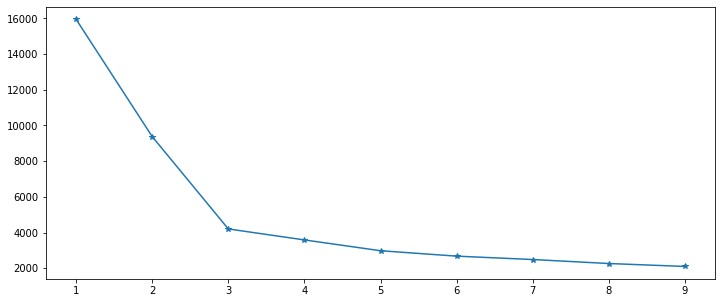

In [125]:
from matplotlib import cm

plt.figure(figsize=(12,5))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "*" )

In [126]:
# At number of cluster = 3, there's a steepest turning point. Hence we will choose number of cluster = 3

kmeans = KMeans(n_clusters=3, n_init = 5, random_state=12345)
kmeans.fit(newdata1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=5, n_jobs=None, precompute_distances='auto',
       random_state=12345, tol=0.0001, verbose=0)

In [127]:
## ==>the number of data in each cluster

labels = kmeans.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[391 219  50]


In [47]:
# Compute the centers in each cluster group
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(newdata1) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,2.313174,2.231428,2.470026
Total_Credit_Cards,5.488491,2.388128,8.740000
Total_visits_bank,3.457801,0.931507,0.600000
Total_visits_online,0.994885,3.589041,10.900000
Total_calls_made,2.012788,6.958904,1.080000


==> DATA INSIGHTS explained after plotting the box plots

In [48]:
# Add cluster number to original cars data

predictions = kmeans.predict(newdata1)
predictions
newdata1["group"] = predictions
newdata1['group'] = newdata1['group'].astype('category')
newdata1.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards        int64
Total_visits_bank         int64
Total_visits_online       int64
Total_calls_made          int64
group                  category
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2979f4d0>,
      dtype=object)

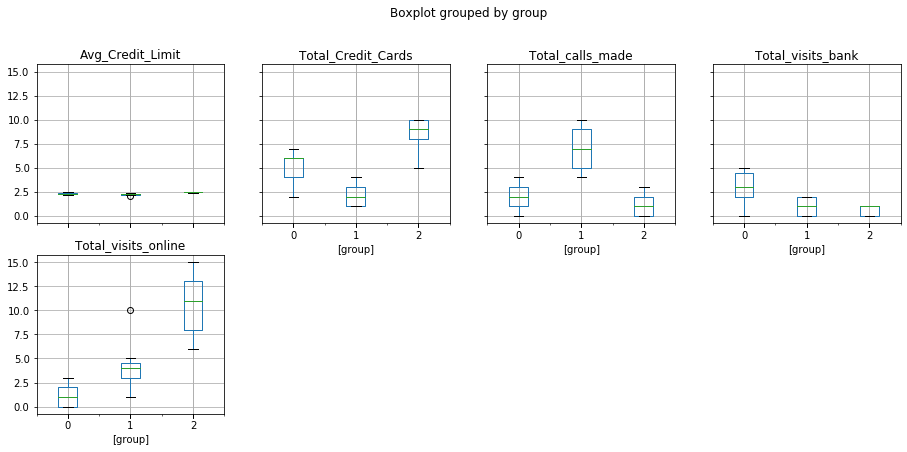

In [49]:
# Plotting the groups by groups

newdata1["group"] = predictions
newdata1.boxplot(by = 'group',  layout=(3,4), figsize=(15, 10))

GROUP ANALYSIS:
- GROUP 2: has the most number of credit card, hence the highest average credit limit. They make the least amount of calls and least amount of visits to banks. They visit online the most.
- Group 1: has the least number of credit cards. They make the most number of phone calls. Yet, they visit the bank and visit online less than Group 0 (more than Group 2).
- Group 0: has more number of credit cards then Group 1, but less than Group 2. They are the least likely to visit online, yet the most likely to visit banks. They make calls more than Group 2, but less than Group 1.

## DELIVERABLE 4: Execute HIERARCHIRAL CLUSTERING (with different linkages) with the help of dendrogramand cophenetic coeff. Analyse clusters formed using boxplot (15 marks)

In [84]:
from scipy.stats import zscore


In [68]:
datascaled=data.iloc[:,2:].apply(zscore)
datascaled.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593
6,1.740187,0.135694,-1.473731,2.861408,-0.553005
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326


In [86]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(datascaled, 'ward', metric='euclidean')
Z.shape

(659, 4)

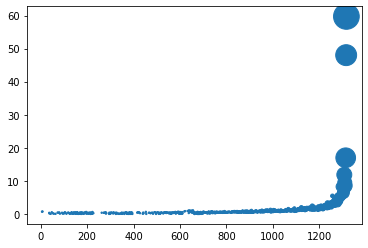

In [131]:
plt.scatter(Z[:,1],Z[:,2],Z[:,3])
plt.show()

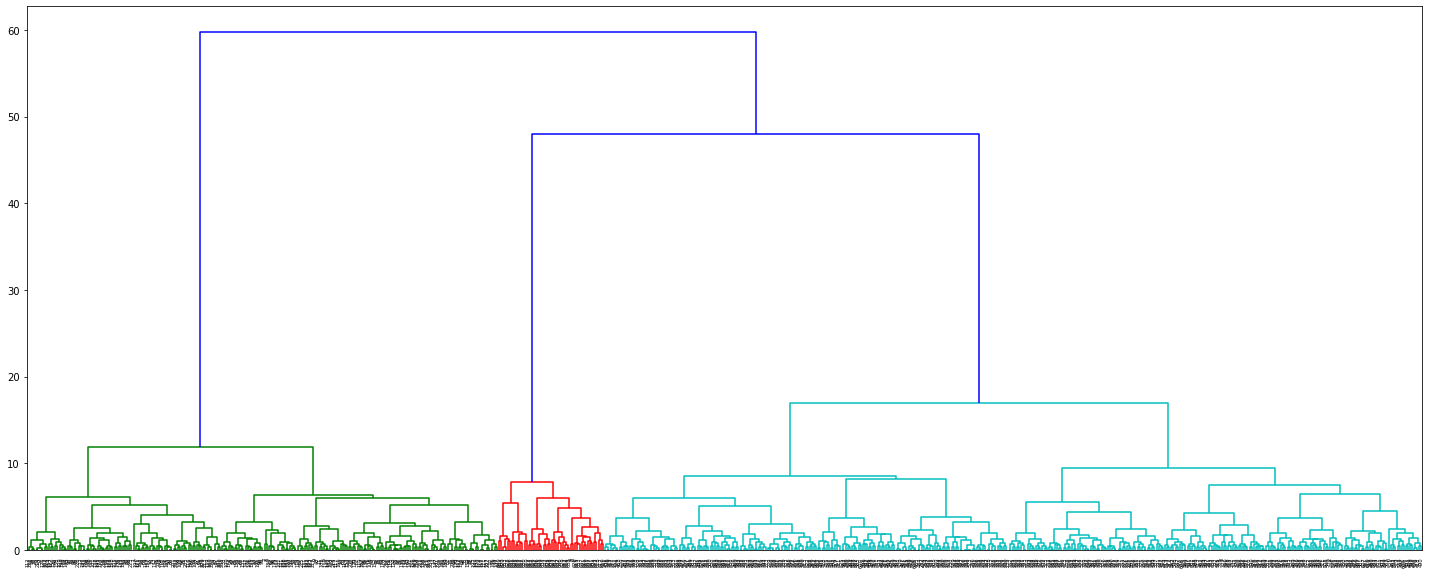

In [132]:
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

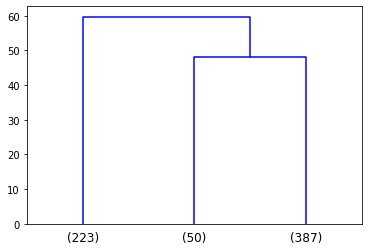

In [133]:
#Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=3,  # show only the last p merged clusters
)
plt.show()

In [101]:
dmax = 50

In [140]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, dmax, criterion='distance')
clusters

array([2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

ValueError: 'c' argument has 660 elements, which is not acceptable for use with 'x' with size 659, 'y' with size 659.

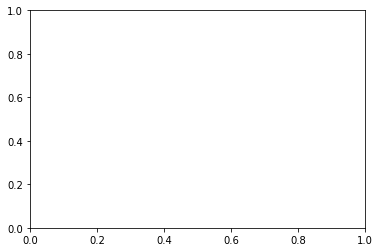

In [142]:
plt.scatter(Z[:,0],Z[:,1],Z[:,2], c=clusters)
plt.show()

In [138]:
model1 = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average') #average linkage method with Agglomerative Clustering
model1.fit(datascaled)
datascaled['groups'] = model1.labels_
datascaled.head(10)



,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels,groups
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2,2


In [122]:
datascaled.groupby('groups').mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,labels
groups,,,,,,
0,-0.022902,0.371882,0.664034,-0.552775,-0.551200,0
1,2.831764,1.862226,-1.105763,2.827319,-0.874330,1
2,-0.595179,-1.062913,-0.904453,0.325372,1.152605,2


In [76]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  
# calculate cophenet index 
Z1 = linkage(datascaled, metric='euclidean', method='average')
c1, coph_dists = cophenet(Z1 , pdist(datascaled))

c1

0.9252387749820263

==> Maxium c value is 1, the closer to 1 the better is the clustering.

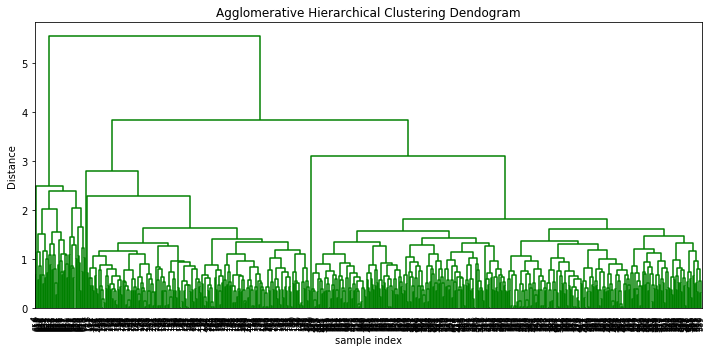

In [77]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z1, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [79]:
# trying different method 'complete'
Z2 = linkage(datascaled, metric='euclidean', method='complete')
c2, coph_dists = cophenet(Z2 , pdist(datascaled))

c2

0.9181204166982053

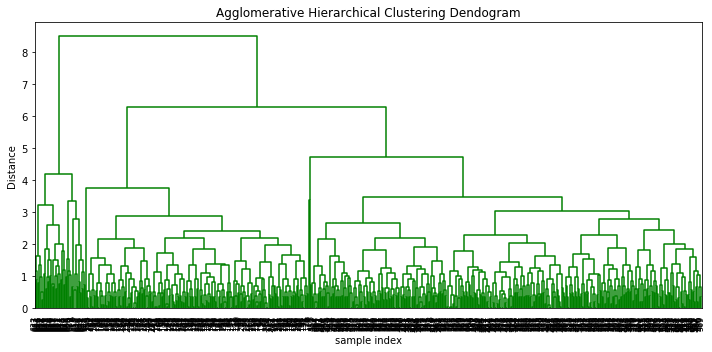

In [80]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z2, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [120]:
#trying different method 'ward'. We get cophenet index is 0.817, lowest than the other 2 methods.
Z3 = linkage(datascaled, metric='euclidean', method='ward')
c3, coph_dists = cophenet(Z3 , pdist(datascaled))

c3

0.8170227112271451

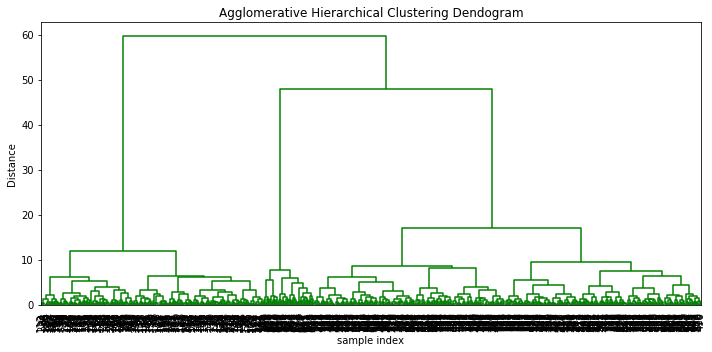

In [83]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z3, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2aa730d0>,
      dtype=object)

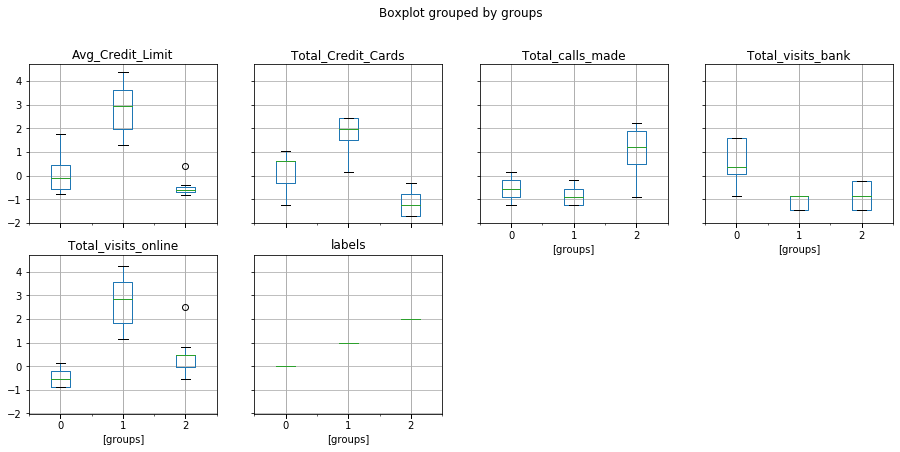

In [123]:
# box plot groups
datascaled.boxplot(by = 'groups',  layout=(3,4), figsize=(15, 10))

GROUP ANALYSIS:
- GROUP 1: has the most number of credit card, hence the highest average credit limit. They make the least amount of calls and least amount of visits to banks. They visit online the most.
- Group 2: has the least number of credit cards (with least number of credit limit). They make the most number of phone calls. Yet, they visit the bank and visit online less than Group 0 (more than Group 1).
- Group 0: has more number of credit cards then Group 2, but less than Group 1. They are the least likely to visit online than , yet the most likely to visit banks. They make calls more than Group 1, but less than Group 2.

## DELIVERABLE 6: Compare K-means clusters with Hierarchical clusters. (5 marks)

K MEANS METHODS RECALL:
GROUP ANALYSIS:
- GROUP 2: has the most number of credit card, hence the highest average credit limit. They make the least amount of calls and least amount of visits to banks. They visit online the most.
- Group 1: has the least number of credit cards. They make the most number of phone calls. Yet, they visit the bank and visit online less than Group 0 (more than Group 2).
- Group 0: has more number of credit cards then Group 1, but less than Group 2. They are the least likely to visit online, yet the most likely to visit banks. They make calls more than Group 2, but less than Group 1.

Similarity: 
- they both have 3 groups

Difference:
- Hierachy: the number of cases for each Group 0, 1, 2: 223, 50, 387
- K means: the number of cases for each Group 0, 1, 2: 391, 219, 50
Even though they have slightly different number of cases per each group, it represents a good trend for each consumer behavior of that group, which is important to know despite the computing method used.

- Group 0 of hierarchy method is same as group 1 of Kmean method, Group 1 of hierachy method is same as group 2 of Kmean method.

## DELIVERABLE 7: Analysis the clusters formed, tell us how is one cluster different from another and answer all the key questions. (10 marks)

1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

- As answered above in deliverable 6, there are 3 types of segments (groups 0,1,2 as analysis with either Kmean or Hierachy method)
- Depending on the method used, the differences of the groups are their tendency to use different service asssitance available to them (call, bank, and online), which is predictable based on the number of credit cards they possess (hence the credit limit they have tends to be higher if they have more number of credit cards) [each group described in details in deliverable 6]

- Hence the recommendation for the bank is to send resources and reminders (or marketing campaign done reached to them) with a method of their choice, depending on the number of group that they belong to (either by analysing with Kmean or Hierachy method). 
For instance, they should target the online banking resources (send email campaign, remidner email, etc.) for Group 2 consumers (of the Kmean method). and vice versa with the other group 0 and 1. Ultimately, this will help to satisfy the customer better based on their references. 
